In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [23]:
df = pd.read_csv("biometria.csv")
df.replace("V", "volei", inplace=True)
df.replace("F", "futebol", inplace=True)
df.head()

,Esporte,Altura (m),Peso (kg)
0,volei,1.90,76
1,volei,1.98,70
2,volei,2.04,101
3,volei,1.88,77
4,volei,2.14,109


In [7]:
df.groupby("Esporte").describe().T

Esporte             futebol       volei
Altura (m) count  23.000000   22.000000
           mean    1.813478    1.986818
           std     0.070878    0.081497
           min     1.630000    1.850000
           25%     1.765000    1.925000
           50%     1.810000    1.980000
           75%     1.870000    2.047500
           max     1.930000    2.140000
Peso (kg)  count  23.000000   22.000000
           mean   75.000000   86.863636
           std     7.537784   10.273848
           min    60.000000   70.000000
           25%    69.500000   78.250000
           50%    76.000000   85.500000
           75%    79.500000   93.000000
           max    88.000000  109.000000

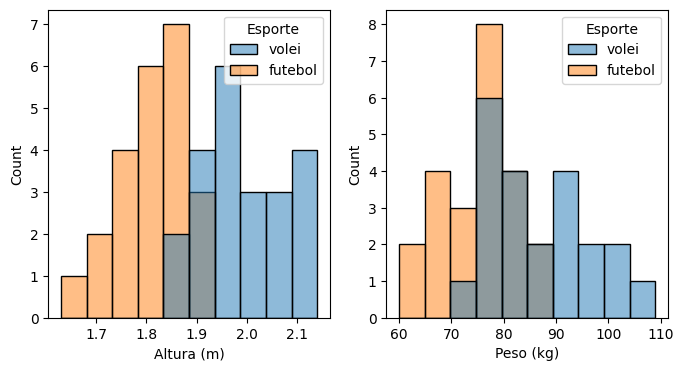

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
sns.histplot(data=df, bins=10, x='Altura (m)', hue='Esporte',
             ax=ax[0])
sns.histplot(data=df, bins=10, x='Peso (kg)', hue='Esporte',
             ax=ax[1])
plt.show()

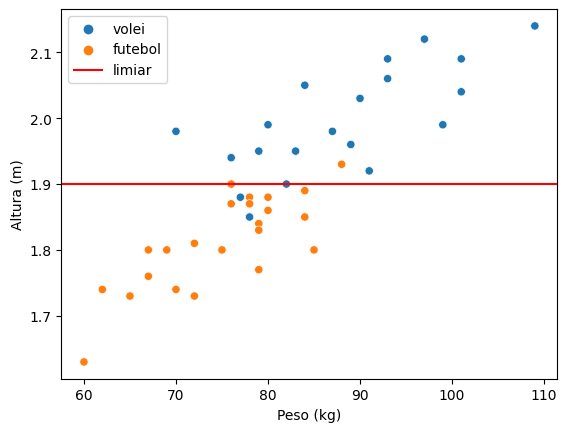

In [9]:
fig, ax = plt.subplots(1)
sns.scatterplot(data=df, x='Peso (kg)', y='Altura (m)', hue='Esporte',
                ax=ax)
ax.axhline(1.9, color='red', label='limiar')
plt.legend()
plt.show()

In [10]:
def classificador_limiar(limiar, atributo, dados, rotulos=None):
    predicoes = []
    for idx in range(len(dados)):
        if dados.loc[idx, atributo] <= limiar:
            predicoes.append(rotulos[0])
        else:
            predicoes.append(rotulos[1])
    return pd.DataFrame(predicoes, columns=['Esporte'])


In [11]:
predicoes = classificador_limiar(1.9, 'Altura (m)',
                                df[["Altura (m)", "Peso (kg)"]],
                                ["futebol", "volei"])

In [12]:
predicoes

,Esporte
0,futebol
1,volei
2,volei
3,futebol
4,volei
5,volei
6,volei
7,volei
8,volei
9,volei


In [13]:
for real, pred in zip( df['Esporte'].values, predicoes['Esporte'].values ):
    print(real, pred)

volei futebol
volei volei
volei volei
volei futebol
volei volei
volei volei
volei volei
volei volei
volei volei
volei volei
volei volei
volei volei
volei volei
volei futebol
volei volei
volei volei
volei futebol
volei volei
volei volei
volei volei
volei volei
volei futebol
futebol futebol
futebol futebol
futebol volei
futebol futebol
futebol futebol
futebol futebol
futebol futebol
futebol futebol
futebol futebol
futebol futebol
futebol futebol
futebol futebol
futebol futebol
futebol futebol
futebol futebol
futebol futebol
futebol futebol
futebol futebol
futebol futebol
futebol futebol
futebol futebol
futebol futebol
futebol futebol


In [14]:
#gabarito == ground truth
def acuracia(gabarito, predicoes):
    acertos = 0
    for real, pred in zip(gabarito, predicoes):
        if real == pred:
            acertos+=1
    return acertos / len(gabarito)

In [15]:
acuracia(df['Esporte'].values, predicoes['Esporte'].values)

0.8666666666666667

In [16]:
from sklearn.metrics import accuracy_score
print("Acurácia: %.3f" % (accuracy_score(df['Esporte'],
                                         predicoes['Esporte'])) )

Acurácia: 0.867


# Treinamento do Classificador

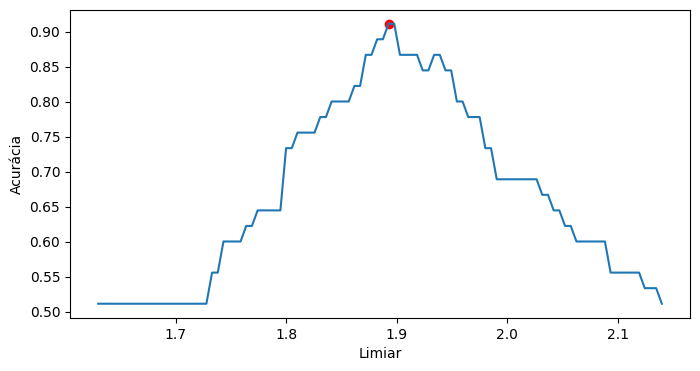

In [24]:
n_limiares = 100
atributo = "Altura (m)"
alt_max = np.max(df[atributo])
alt_min = np.min(df[atributo])
limiares = np.linspace(alt_min, alt_max, n_limiares)

acuracias = []
melhor_limiar = None
melhor_acuracia = -1

for limiar in limiares:
    predicoes = classificador_limiar(limiar,
                                     atributo,
                                     df[["Altura (m)", "Peso (kg)"]],
                                     ['futebol', 'volei'])

    acuracia = accuracy_score(df['Esporte'], predicoes['Esporte'])

    if acuracia > melhor_acuracia:
        melhor_acuracia = acuracia
        melhor_limiar = limiar

    acuracias.append(acuracia)

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(limiares, acuracias)
ax.scatter(melhor_limiar, melhor_acuracia, color='red')
ax.set_xlabel("Limiar")
ax.set_ylabel("Acurácia")
plt.show()


In [22]:
print("Melhor Limiar: %.2f, Melhor Acurácia: %.2f" % (melhor_limiar, melhor_acuracia))

Melhor Limiar: 1.89, Melhor Acurácia: 0.91
